In [449]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import linearmodels as lm
import linearmodels.panel as lmp

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")
yr = list(df.yr)
df = df.set_index(['country', 'yr'])
df["yr"] = yr
df

lat     long  inbtou_volume  inbtou_volume_ov   
country             yr                                                        
antigua_and_barbuda 2010  17.0608 -61.7964   8.128600e+05               NaN  \
                    2011  17.0608 -61.7964   8.702400e+05               NaN   
                    2012  17.0608 -61.7964   8.426900e+05               NaN   
                    2013  17.0608 -61.7964   8.055500e+05               NaN   
                    2014  17.0608 -61.7964   7.925900e+05               NaN   
...                           ...      ...            ...               ...   
us_virgin_islands   2018  18.3358 -64.8963   1.922000e+09               NaN   
                    2019  18.3358 -64.8963   2.074000e+09               NaN   
                    2020  18.3358 -64.8963   8.620000e+08               NaN   
                    2021  18.3358 -64.8963            NaN               NaN   
                    2022  18.3358 -64.8963            NaN               NaN   

                          inbtou_volume_sd  inbtou_volume_air   
country             yr                                          
antigua_and_barbuda 2010               NaN                NaN  \
                    2011               NaN                NaN   
                    2012               NaN                NaN   
                    2013               NaN                NaN   
                    2014               NaN                NaN   
...                                    ...                ...   
us_virgin_islands   2018               NaN                NaN   
                    2019               NaN                NaN   
                    2020               NaN                NaN   
                    2021               NaN                NaN   
                    2022               NaN                NaN   

                          inbtou_volume_cruise  inbtou_spending   
country             yr                                            
antigua_and_barbuda 2010                   NaN      568930500.0  \
                    2011                   NaN      598619300.0   
                    2012                   NaN      666070300.0   
                    2013                   NaN      658851600.0   
                    2014                   NaN      595796200.0   
...                                        ...              ...   
us_virgin_islands   2018                   NaN              NaN   
                    2019                   NaN              NaN   
                    2020                   NaN              NaN   
                    2021                   NaN              NaN   
                    2022                   NaN              NaN   

                          inbtou_spending_travel  inbtou_spending_transport   
country             yr                                                        
antigua_and_barbuda 2010                     NaN                        NaN  \
                    2011                     NaN                        NaN   
                    2012                     NaN                        NaN   
                    2013                     NaN                        NaN   
                    2014                     NaN                        NaN   
...                                          ...                        ...   
us_virgin_islands   2018                     NaN                        NaN   
                    2019                     NaN                        NaN   
                    2020                     NaN                        NaN   
                    2021                     NaN                        NaN   
                    2022                     NaN                        NaN   

                          covid19_cases  covid19_deaths  covid19_mortality   
country             yr                                                       
antigua_and_barbuda 2010              0               0           0.000000  \
                    20

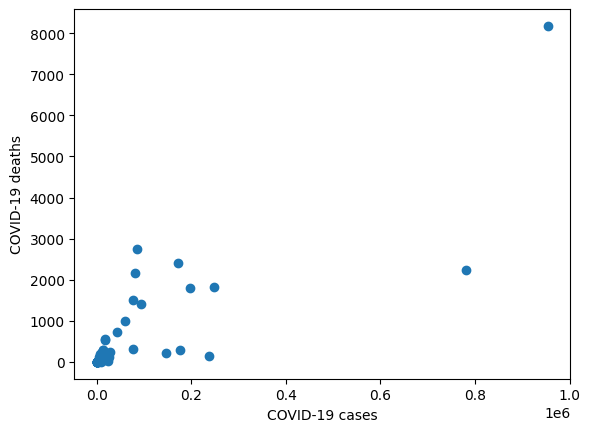

In [454]:
_df = df.loc[df["yr"] >= 2020]

plt.scatter(
    x=_df["covid19_cases"],
    y=_df["covid19_deaths"],
)
plt.xlabel("COVID-19 cases")
plt.ylabel("COVID-19 deaths")
plt.show()

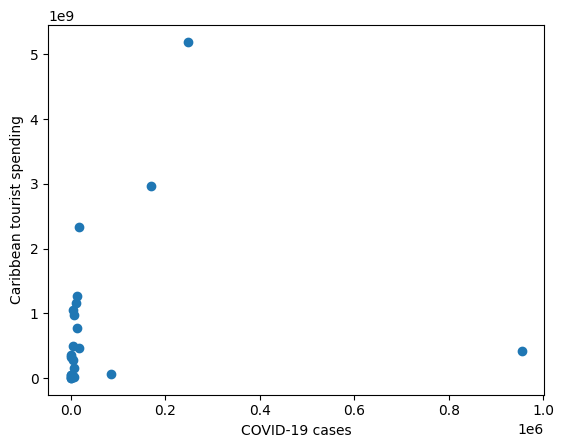

In [456]:
_df = df.loc[df["yr"] >= 2020]

plt.scatter(
    x=_df["covid19_cases"],
    y=_df["inbtou_spending"],
)
plt.xlabel("COVID-19 cases")
plt.ylabel("Caribbean tourist spending")
plt.show()

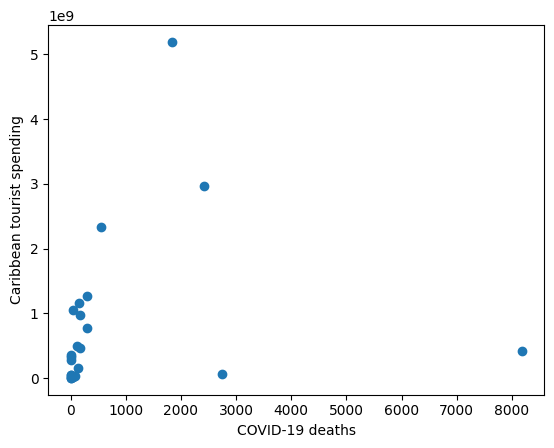

In [458]:
_df = df.loc[df["yr"] >= 2020]

plt.scatter(
    x=_df["covid19_deaths"],
    y=_df["inbtou_spending"],
)
plt.xlabel("COVID-19 deaths")
plt.ylabel("Caribbean tourist spending")
plt.show()

In [430]:
def fixed_effects(
    df,
    y_name:         str,
    x_vars:         list[str] = ["covid19_cases", "covid19_deaths"],
    incl_chrs:      bool = False,
    cluster_entity: bool = False,
    cluster_time:   bool = False,
):
    if incl_chrs:
        x_vars += ["lat", "long"]
    df = df[[y_name] + x_vars].dropna()

    return (
        lm.PanelOLS(df[y_name], sm.add_constant(df[x_vars])).fit(cov_type="robust")
        if not (cluster_entity or cluster_time)
        else lm.PanelOLS(df[y_name], sm.add_constant(df[x_vars]), entity_effects=True).fit(
            cov_type="clustered",
            cluster_entity=cluster_entity,
            cluster_time=cluster_time,
        )
    )

In [440]:
print(lmp.compare({
    "FE":        fixed_effects(df, "inbtou_volume"),
    "FE Entity": fixed_effects(df, "inbtou_volume", cluster_entity=True),
}))

                      Model Comparison                     
                                       FE         FE Entity
-----------------------------------------------------------
Dep. Variable               inbtou_volume     inbtou_volume
Estimator                        PanelOLS          PanelOLS
No. Observations                      219               219
Cov. Est.                          Robust         Clustered
R-squared                          0.0012         4.757e-05
R-Squared (Within)                -0.0171         4.757e-05
R-Squared (Between)                0.0023         1.188e-06
R-Squared (Overall)                0.0012            0.0001
F-statistic                        0.1248            0.0047
P-value (F-stat)                   0.8827            0.9953
=====================     ===============   ===============
const                             1.2e+08         1.175e+08
                                 (3.3239)          (1254.0)
covid19_cases                      1243.

In [441]:
print(lmp.compare({
    "FE":        fixed_effects(df, "inbtou_spending"),
    "FE Entity": fixed_effects(df, "inbtou_spending", cluster_entity=True),
}))

                        Model Comparison                       
                                         FE           FE Entity
---------------------------------------------------------------
Dep. Variable               inbtou_spending     inbtou_spending
Estimator                          PanelOLS            PanelOLS
No. Observations                        184                 184
Cov. Est.                            Robust           Clustered
R-squared                            0.0023              0.2029
R-Squared (Within)                   0.0589              0.2029
R-Squared (Between)                 -0.0025             -0.0257
R-Squared (Overall)                  0.0023             -0.0099
F-statistic                          0.2109              21.122
P-value (F-stat)                     0.8101              0.0000
=====================     =================   =================
const                             1.538e+09           1.566e+09
                                   (10.8

In [471]:
print(lmp.compare({
    "FE":        fixed_effects(df, "inbtou_volume",
                               x_vars=["covid19_mortality"]),
    "FE Entity": fixed_effects(df, "inbtou_volume",
                               x_vars=["covid19_mortality"], cluster_entity=True),
}))

                      Model Comparison                     
                                       FE         FE Entity
-----------------------------------------------------------
Dep. Variable               inbtou_volume     inbtou_volume
Estimator                        PanelOLS          PanelOLS
No. Observations                      219               219
Cov. Est.                          Robust         Clustered
R-squared                          0.0026            0.0069
R-Squared (Within)                -0.0097            0.0069
R-Squared (Between)                0.0032            0.0012
R-Squared (Overall)                0.0026            0.0017
F-statistic                        0.5764            1.3862
P-value (F-stat)                   0.4485            0.2404
=====================     ===============   ===============
const                           1.248e+08         1.202e+08
                                 (3.3028)          (38.005)
covid19_mortality              -3.492e+0

In [472]:
print(lmp.compare({
    "FE":        fixed_effects(df, "inbtou_spending",
                               x_vars=["covid19_mortality"]),
    "FE Entity": fixed_effects(df, "inbtou_spending",
                               x_vars=["covid19_mortality"], cluster_entity=True),
}))

                        Model Comparison                       
                                         FE           FE Entity
---------------------------------------------------------------
Dep. Variable               inbtou_spending     inbtou_spending
Estimator                          PanelOLS            PanelOLS
No. Observations                        184                 184
Cov. Est.                            Robust           Clustered
R-squared                            0.0126              0.0694
R-Squared (Within)                   0.0535              0.0694
R-Squared (Between)                  0.0091              0.0062
R-Squared (Overall)                  0.0126              0.0112
F-statistic                          2.3138              12.451
P-value (F-stat)                     0.1300              0.0005
=====================     =================   =================
const                             1.583e+09           1.565e+09
                                   (10.8

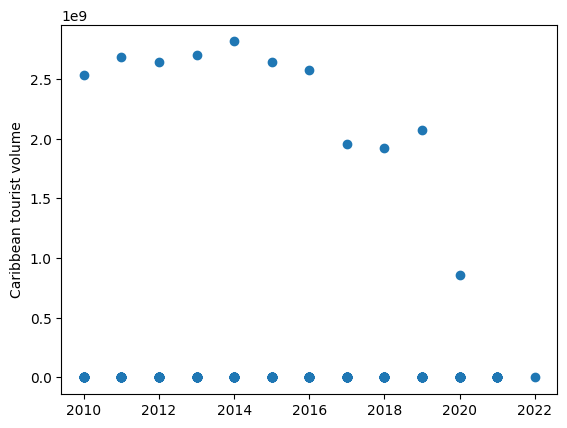

In [469]:
plt.scatter(x=df['yr'], y=df['inbtou_volume'])
plt.ylabel("Caribbean tourist volume")
plt.show()

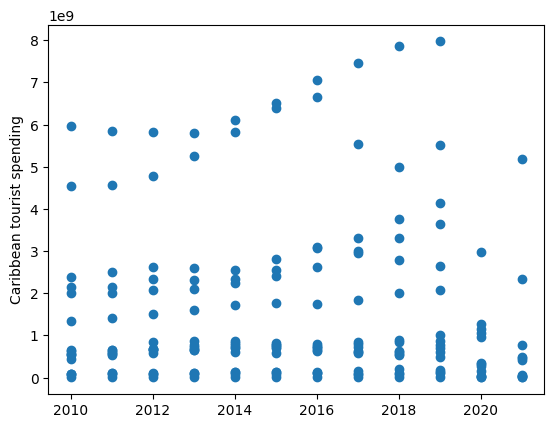

In [470]:
plt.scatter(x=df['yr'], y=df['inbtou_spending'])
plt.ylabel("Caribbean tourist spending")
plt.show()

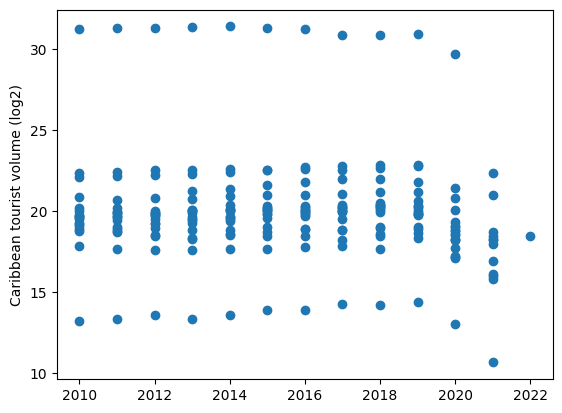

In [465]:
plt.scatter(x=df['yr'], y=np.log2(df['inbtou_volume']))
plt.ylabel("Caribbean tourist volume (log2)")
plt.show()

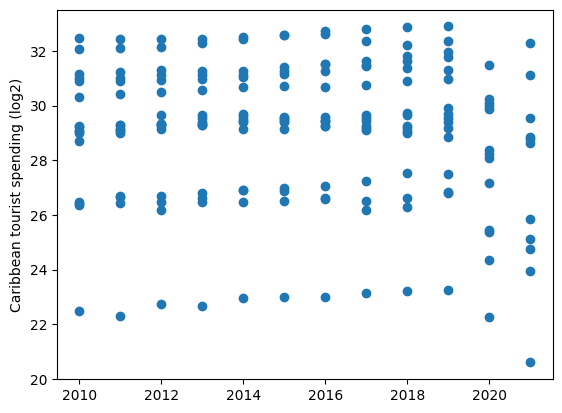

In [466]:
plt.scatter(x=df['yr'], y=np.log2(df['inbtou_spending']))
plt.ylabel("Caribbean tourist spending (log2)")
plt.show()